<a href="https://colab.research.google.com/github/lblogan14/opencv3_with_python/blob/master/ch7_detect_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/OpenCV3_with_Python_by_Example/data/ch7/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/OpenCV3_with_Python_by_Example/data/ch7


In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Contour analysis and shape matching
When we convert an image to grayscale and threshold it, we are left
with a bunch of lines and contours. Once we understand the properties of different shapes,
we will be able to extract detailed information from an image.

For example, let's try to identify a boomerang shape in the following image
![alt text](https://github.com/PacktPublishing/OpenCV-3-x-with-Python-By-Example/blob/master/Chapter07/images/shapes.png?raw=true)
 
 with a reference.
![alt text](https://github.com/PacktPublishing/OpenCV-3-x-with-Python-By-Example/blob/master/Chapter07/images/boomerang.png?raw=true)

The matching is based on the concept of **Hu moment**, which in turn is related to image
moments.  The concept of *image
moments* basically refers to the weighted and power-raised summation of the pixels within a
shape.
$$I=\sum\limits_{i=0}^{N}w_ip_i^k$$
* $p$ refers to the pixels inside the contour, 
* $w$ refers to the weights, 
* $N$ refers to the number of points inside the contour,
* $k$ refers to the power, and 
* $I$ refers to the moment

Depending on the values we choose for $w$ and $k$, we can extract different
characteristics from that contour.

In [0]:
# extract all the contours from the image
def get_all_contours(img):
  ref_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(ref_gray, 127, 255, 0)
  # Find all the contours in the thresholded image. The values for the second
  # and the third parameters are restricted to a certain number of possible
  # values. 
  im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  return contours

In [0]:
# extract reference contour from the image
def get_ref_contour(img):
  contours = get_all_contours(img)
  
  # Extract the relevant contour based on area ratio. We use the area ratio
  # bacause the main image boundary contour is extracted as well and we don't
  # want that. This area ratio threshold will ensure that we only take the
  # contour inside the image
  for contour in contours:
    area = cv2.contourArea(contour)
    img_area = img.shape[0] * img.shape[1]
    if 0.05 < area/float(img_area) < 0.8:
      return contour

In [0]:
# boomerang refernce image
img1 = cv2.imread('boomerang.png')
# input image containing all the different shapes
img2 = cv2.imread('shapes.png')

In [0]:
# extract the reference contour
ref_contour = get_ref_contour(img1)
# extract all the contours from the input image
input_contours = get_all_contours(img2)

(-0.5, 767.5, 542.5, -0.5)

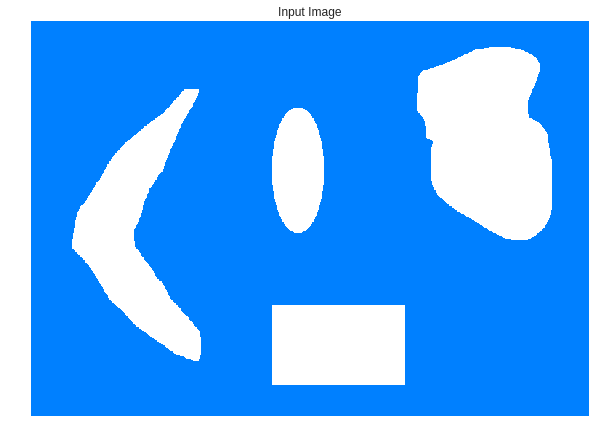

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

(-0.5, 767.5, 542.5, -0.5)

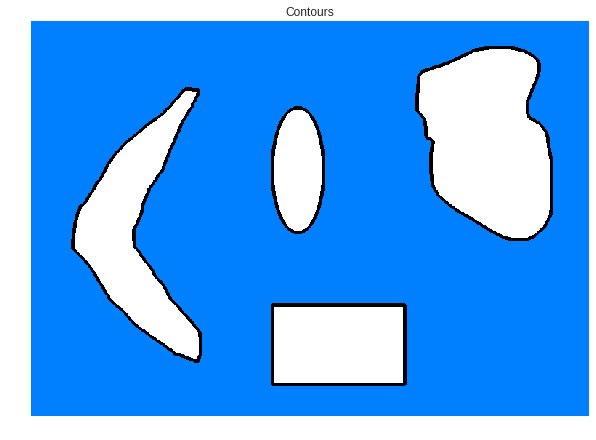

In [8]:
closest_contour = None
min_dist = None
contour_img = img2.copy()
cv2.drawContours(contour_img, input_contours, -1, color=(0,0,0), thickness=3)

contour_img_rgb = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.imshow(contour_img_rgb)
plt.title('Contours')
plt.axis('off')

Contour 0 matchs in 0.722470
Contour 1 matchs in 0.512469
Contour 2 matchs in 0.091121
Contour 3 matchs in 1.435540


(-0.5, 767.5, 542.5, -0.5)

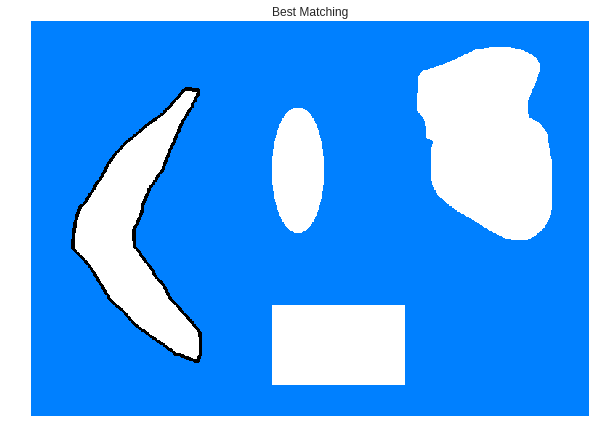

In [9]:
# find the closest contour
for i, contour in enumerate(input_contours):
  # match the shapes and take the closest one using comparison method
  # CV_CONTOURS_MATCH_I3 (second argument)
  ret = cv2.matchShapes(ref_contour, contour, 3, 0.0)
  print('Contour {:d} matchs in {:f}'.format(i, ret))
  if min_dist is None or ret < min_dist:
    min_dist = ret
    closest_contour = contour
    
cv2.drawContours(img2, [closest_contour], 0, color=(0,0,0), thickness=3)
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Best Matching')
plt.axis('off')

#Approximate a contour
A lot of contours that we encounter in real life are noisy, which means the contours do not look smooth.

One way to deal with this situation is to get all the points on the contour and then approximate it with a smooth polygon.

The following code converts the contours into approximate smoothing of polygons

We will approximate the contours using various thresholds,

In [0]:
# input image containing all the different shapes
img1 = cv2.imread('shapes.png')
# extract all the contours from the input image
input_contours = get_all_contours(img1)

contour_img = img1.copy()
smoothen_contours = []
factor = 0.05

# find the closest contour
for contour in input_contours:
  epsilon = factor * cv2.arcLength(contour, True)
  smoothen_contours.append(cv2.approxPolyDP(contour, epsilon, True))

(-0.5, 767.5, 542.5, -0.5)

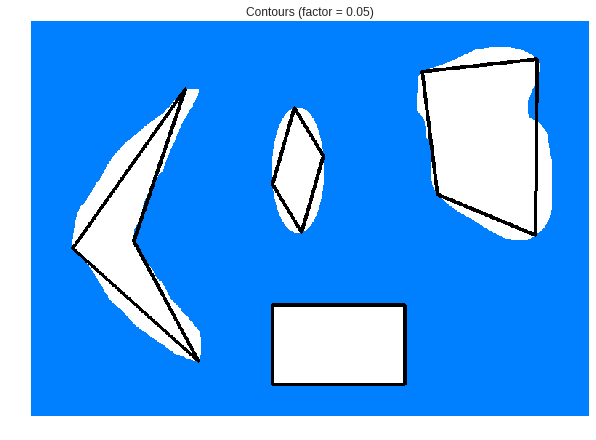

In [11]:
plt.figure(figsize=(10,8))
cv2.drawContours(contour_img, smoothen_contours, -1, color=(0,0,0), thickness=3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours (factor = {})'.format(factor))
plt.axis('off')

(-0.5, 767.5, 542.5, -0.5)

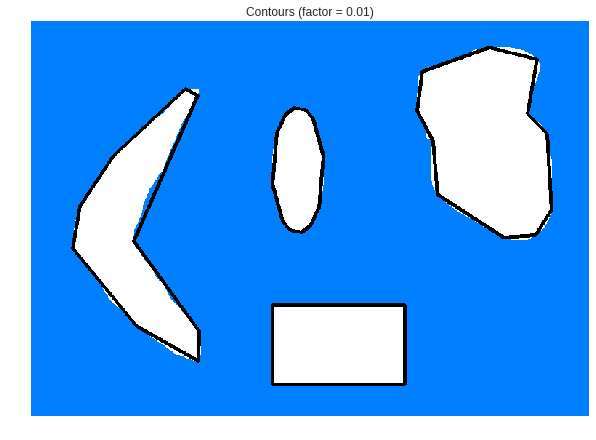

In [12]:
# input image containing all the different shapes
img1 = cv2.imread('shapes.png')
# extract all the contours from the input image
input_contours = get_all_contours(img1)

contour_img = img1.copy()
smoothen_contours = []
factor = 0.01

for contour in input_contours:
  epsilon = factor * cv2.arcLength(contour, True)
  smoothen_contours.append(cv2.approxPolyDP(contour, epsilon, True))
  
plt.figure(figsize=(10,8))
cv2.drawContours(contour_img, smoothen_contours, -1, color=(0,0,0), thickness=3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours (factor = {})'.format(factor))
plt.axis('off')

(-0.5, 767.5, 542.5, -0.5)

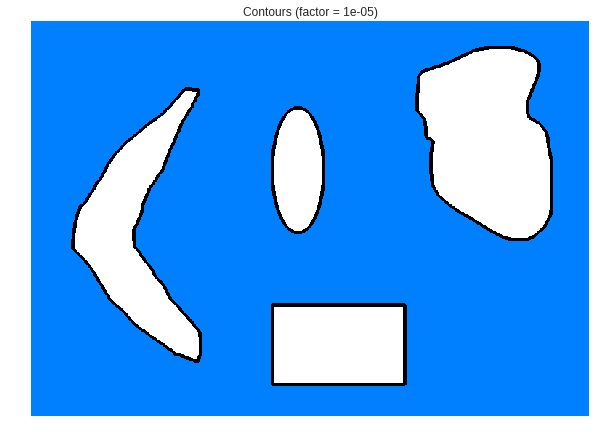

In [13]:
# input image containing all the different shapes
img1 = cv2.imread('shapes.png')
# extract all the contours from the input image
input_contours = get_all_contours(img1)

contour_img = img1.copy()
smoothen_contours = []
factor = 0.00001

for contour in input_contours:
  epsilon = factor * cv2.arcLength(contour, True)
  smoothen_contours.append(cv2.approxPolyDP(contour, epsilon, True))
  
plt.figure(figsize=(10,8))
cv2.drawContours(contour_img, smoothen_contours, -1, color=(0,0,0), thickness=3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours (factor = {})'.format(factor))
plt.axis('off')

#Identify a pizza with a slice taken out
In this case, we cannot apply the previous approach with a reference because we do not know what the shape looks like (how big the slice is).
![alt text](https://github.com/PacktPublishing/OpenCV-3-x-with-Python-By-Example/blob/master/Chapter07/images/convex_shapes.png?raw=true)
We know which shape we refer to but we need a method to describe in a way that the computer can understand. Note that  all the other shapes are nicely
closed; that is, you can take any two points within those shapes and draw a line between
them, and that line will always lie within that shape. These kinds of shapes are called
**convex shapes**.

If you look at the sliced pizza shape, we can choose two points such that the line between
them goes outside the shape:


(-0.5, 703.5, 500.5, -0.5)

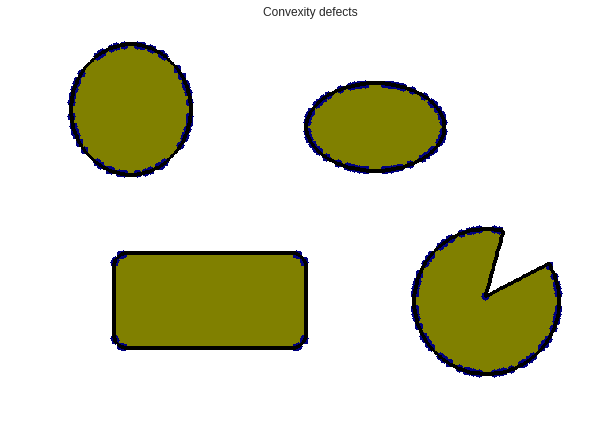

In [14]:
img = cv2.imread('convex_shapes.png')
# iterate over the extracted contours
for contour in get_all_contours(img):
  # extract convex hull from the contour
  hull = cv2.convexHull(contour, returnPoints=False)
  
  # extract convexity defects from the above hull
  defects = cv2.convexityDefects(contour, hull)
  
  if defects is None:
    continue



  # draw lines and circles to show the defects
  for i in range(defects.shape[0]):
    start_defect, end_defect, far_defect, _ = defects[i,0]
    start = tuple(contour[start_defect][0])
    end = tuple(contour[end_defect][0])
    far = tuple(contour[far_defect][0])
    cv2.circle(img, far, 5, [128,0,0], -1)
    cv2.drawContours(img, [contour], -1, color=(0,0,0), thickness=3)
plt.figure(figsize=(10,8))    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Convexity defects')
plt.axis('off')


Why did they all have so many points representing defects? If you zoom in the picture, you can see the curves here are not smooth; they are composed of many short line segments. If you run the convexity detector here, it is not going to work.

This is the reason why the contour approximation is introduced here. Once we have detected the contours, we need to smoothen them so that the ridges do not affect them.

(-0.5, 703.5, 500.5, -0.5)

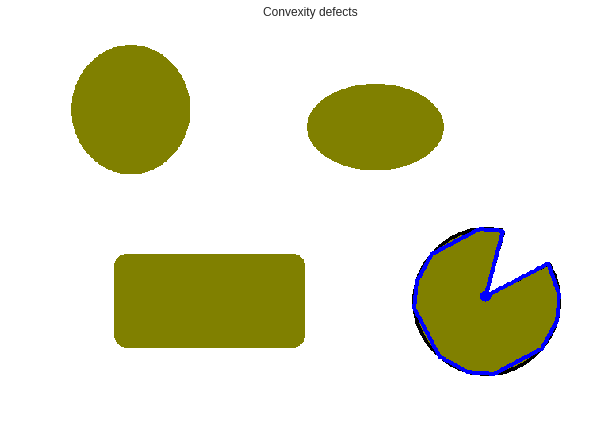

In [18]:
img = cv2.imread('convex_shapes.png')
# smoothen 
factor = 0.01
# iterate over the extracted contours
for contour in get_all_contours(img):
  orig_contour = contour
  epsilon = factor * cv2.arcLength(contour, True)
  contour = cv2.approxPolyDP(contour, epsilon, True)
  
  # extract convex hull and the convexity defects
  hull = cv2.convexHull(contour, returnPoints=False)
  defects = cv2.convexityDefects(contour, hull)
  
  if defects is None:
    continue
    
  # draw lines and circles to show the defects
  for i in range(defects.shape[0]):
    start_defect, end_defect, far_defect, _ = defects[i,0]
    start = tuple(contour[start_defect][0])
    end = tuple(contour[end_defect][0])
    far = tuple(contour[far_defect][0])
    cv2.circle(img, far, 7, [255,0,0], -1)
    cv2.drawContours(img, [orig_contour], -1, color=(0,0,0), thickness=3)
    cv2.drawContours(img, [contour], -1, color=(255,0,0), thickness=3)
    
plt.figure(figsize=(10,8))    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Convexity defects')
plt.axis('off')


#Censor a shape
Identify all the boomerang shapes and then block them out without using any template images.

(-0.5, 696.5, 585.5, -0.5)

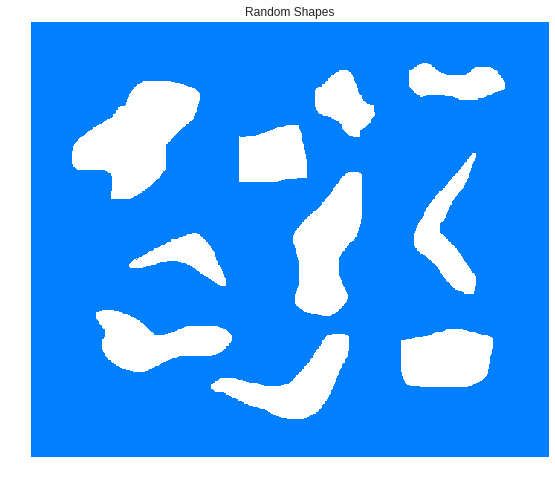

In [19]:
img = cv2.imread('random_shapes.png')
plt.figure(figsize=(10,8))    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Random Shapes')
plt.axis('off')


Consider the convex hull.

**Solidity factor** in shape analysis is used to take the ratio of the area of each shape to the area of the convex hull. The metric has a lower value for the boomerang shapes because of the empty area that will be left out:

In [0]:
img_orig = np.copy(img)
input_contours = get_all_contours(img)
solidity_values = []

# compute solidity factors of all the contours
for contour in input_contours:
  area_contour = cv2.contourArea(contour)
  convex_hull = cv2.convexHull(contour)
  area_hull = cv2.contourArea(convex_hull)
  solidity = float(area_contour)/area_hull
  solidity_values.append(solidity)

Apply **K-means clustering** to separate out the input data into K classes.

Here we want to separate the shapes into two groups, that is, boomerang shapes and other shapes. So K=2.

This approach works only in this particular case. If
you are dealing with other kinds of shapes, then you will have to use some other metrics to
make sure that the shape detection works

In [0]:
# clustering using KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
solidity_values = np.array(solidity_values).reshape((len(solidity_values), 1)).astype('float32')
compactness, labels, centers = cv2.kmeans(solidity_values, 2, None, criteria, 10, flags)

In [0]:
closest_class = np.argmin(centers)
output_contours = []
for i in solidity_values[labels==closest_class]:
  index = np.where(solidity_values==i)[0][0]
  output_contours.append(input_contours[index])

(-0.5, 696.5, 585.5, -0.5)

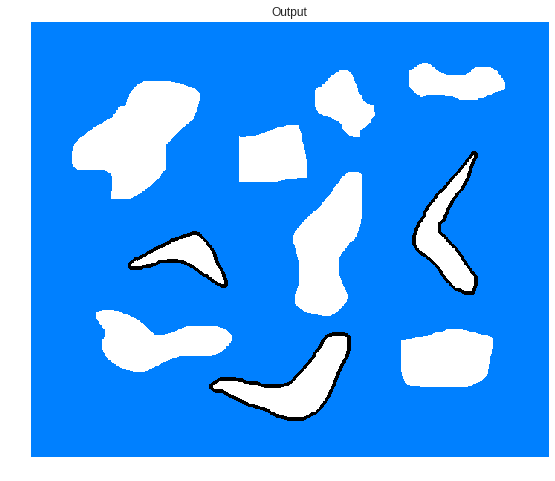

In [24]:
plt.figure(figsize=(10,8))
cv2.drawContours(img, output_contours, -1, (0,0,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Output')
plt.axis('off')

(-0.5, 696.5, 585.5, -0.5)

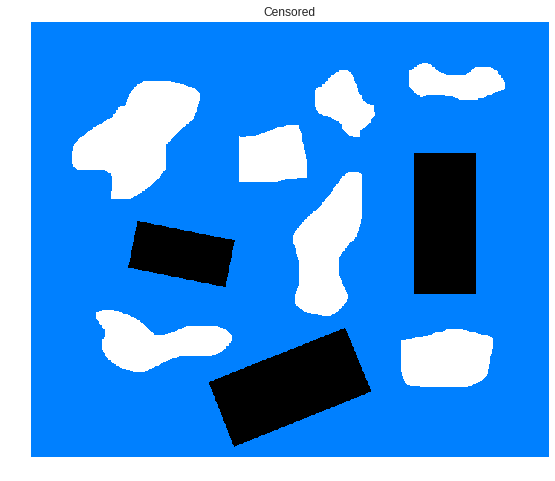

In [25]:
# censoring 
for contour in output_contours:
  rect = cv2.minAreaRect(contour)
  box = cv2.boxPoints(rect)
  box = np.int0(box)
  cv2.drawContours(img_orig, [box], 0, (0,0,0), -1)
  
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title('Censored')
plt.axis('off')

#Image segmentation
is the process of separating an image into its constituent parts, which is an important step in computer vision applications in the real world.

**GrabCut** is an image segmentation method based on a more generic approach called **graph-cuts**.  In the graph-cuts method, we
consider the entire image to be a graph, and then we segment the graph based on the
strength of the edges in that graph. We construct the graph by considering each pixel to be a
node, and edges are constructed between the nodes, where edge weight is a function of the
pixel values of those two nodes. Whenever there is a boundary, the pixel values are higher.
Hence, the edge weights will also be higher. This graph is then segmented by minimizing
the Gibbs energy of the graph. This is analogous to finding the maximum entropy
segmentation.

In [0]:
img_orig = cv2.imread('hand_pen.jpg')
y, x = img_orig.shape[:2]

In [0]:
# define the region of interest
x_init, y_init = 150, 70
rect = (x_init, y_init, x-x_init, y-y_init)
# grabcut algorithm
def grabcut(img_orig, rect):
  # initialize the mask
  mask = np.zeros(img_orig.shape[:2], np.uint8)
  
  # extract the rectangle and set the region of interest in the mask
  x, y, w, h = rect
  mask[y:y+h, x:x+w] = 1
  
  # initialize background and foreground models
  bgdModel = np.zeros((1,65), np.float64)
  fgdModel = np.zeros((1,65), np.float64)
  
  # run grabcut algorithm
  cv2.grabCut(img_orig, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
  
  # extract new mask
  mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
  
  # apply the above mask to the image
  img_orig = img_orig * mask2[:,:,np.newaxis]
  
  # display image
  plt.figure(figsize=(10,8))
  plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
  plt.title('Output')
  plt.axis('off')

In [0]:
img = img_orig.copy()

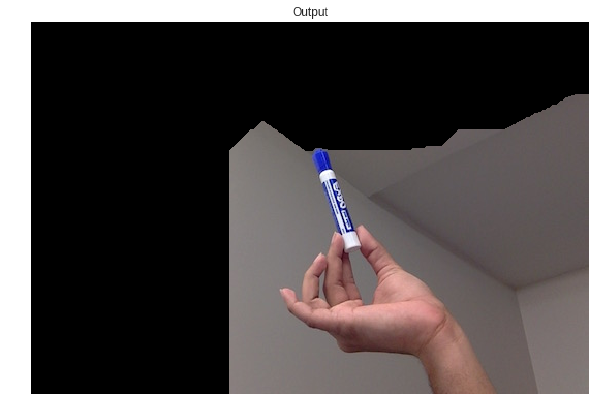

In [37]:
grabcut(img, rect)

#Watershed algorithm
The theory behind the watershed algorithm says any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills, while low intensity denotes valleys.

In [0]:
img = cv2.imread('road.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=4)
# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

(-0.5, 639.5, 479.5, -0.5)

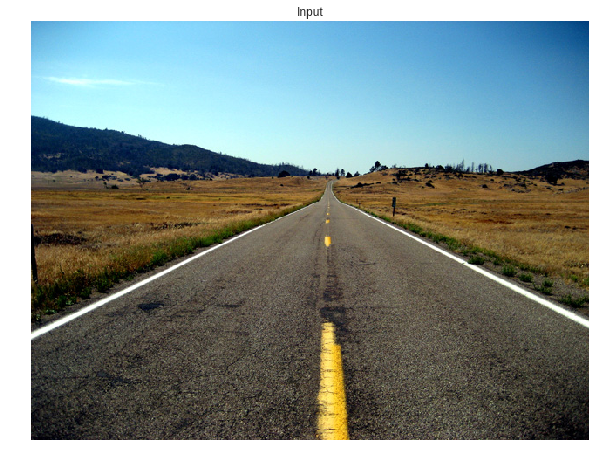

In [55]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input')
plt.axis('off')

In [0]:
# find sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [0]:
# marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# add one to all labels so that sure background is not 0, but 1
markers = markers + 1

In [0]:
# mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)
img[markers==-1] = [255,255,255]

(-0.5, 639.5, 479.5, -0.5)

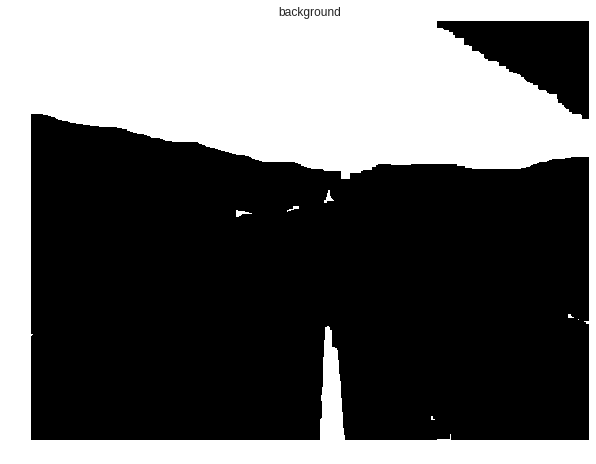

In [59]:
plt.figure(figsize=(10,8))
plt.imshow(sure_bg)
plt.title('background')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

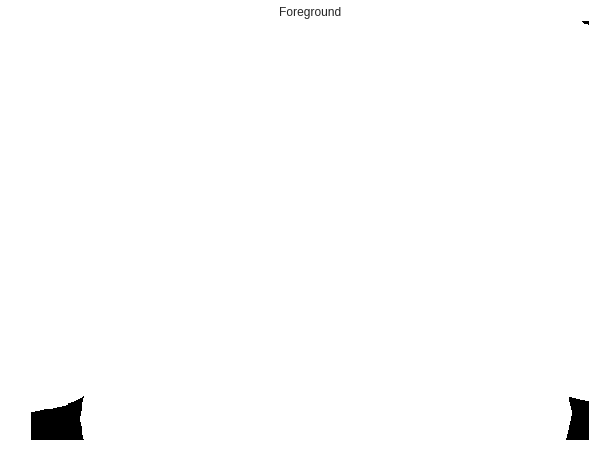

In [61]:
plt.figure(figsize=(10,8))
plt.imshow(sure_fg)
plt.title('Foreground')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

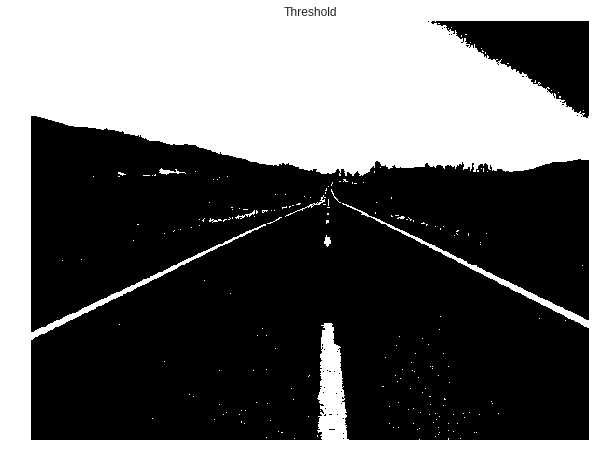

In [62]:
plt.figure(figsize=(10,8))
plt.imshow(thresh)
plt.title('Threshold')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

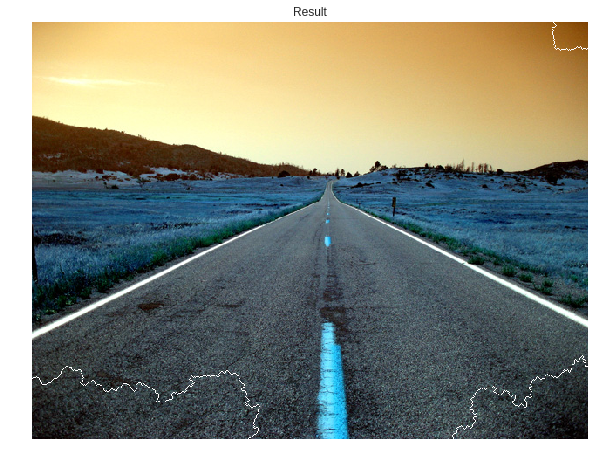

In [64]:
plt.figure(figsize=(10,8))
plt.imshow(sure_bg)
plt.imshow(sure_fg)
plt.imshow(thresh)
plt.imshow(img)
plt.title('Result')
plt.axis('off')